In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
csv_path = "../data/starwars/starwars_mocloose_sales_202510061222.csv"
df = pd.read_csv(csv_path, low_memory=False)

# Convert likely date/time columns
for col in df.columns:
    if any(k in col.lower() for k in ["date", "time", "timestamp"]):
        try:
            df[col] = pd.to_datetime(df[col], errors="coerce", infer_datetime_format=True)
        except:
            pass

df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52062 entries, 0 to 52061
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   figure          52062 non-null  object 
 1   authenticity_n  52062 non-null  int64  
 2   selling_price   52062 non-null  float64
 3   sales           52062 non-null  float64
 4   condition       52062 non-null  object 
 5   character_type  52062 non-null  object 
 6   year            52062 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 2.8+ MB


,figure,authenticity_n,selling_price,sales,condition,character_type,year
0,2-1B,0,8.59,0.4,loose_figure,droid,2013
1,2-1B,0,10.58,0.4,loose_figure,droid,2013
2,2-1B,0,9.58,0.4,loose_figure,droid,2013
3,2-1B,0,9.58,0.4,loose_figure,droid,2013
4,2-1B,0,10.58,0.4,loose_figure,droid,2013


In [7]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
figure,52062,122,Chewbacca,535,NaN,NaN,NaN,NaN,NaN,NaN,NaN
authenticity_n,52062.0,NaN,NaN,NaN,0.444681,0.496935,0.0,0.0,0.0,1.0,1.0
selling_price,52062.0,NaN,NaN,NaN,346.672869,1575.778828,0.0,51.0825,122.115,290.165,130095.0
sales,52062.0,NaN,NaN,NaN,6.923053,9.555758,0.1,1.9,3.7,8.0,82.8
condition,52062,2,loose_figure,29570,NaN,NaN,NaN,NaN,NaN,NaN,NaN
character_type,52062,7,alien/other,18099,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,52062.0,NaN,NaN,NaN,2019.215301,3.606965,2009.0,2016.0,2019.0,2022.0,2025.0


In [1]:
sns.set(style="whitegrid", palette="muted")

# Distribution of selling prices
plt.figure(figsize=(8,5))
sns.histplot(df['selling_price'], bins=40, kde=True)
plt.title("Distribution of Selling Prices")
plt.show()

# Boxplot: Selling Price vs Condition
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="condition", y="selling_price")
plt.title("Selling Price by Condition")
plt.xticks(rotation=45)
plt.show()

# Scatter: Authenticity vs Price
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="authenticity_n", y="selling_price", alpha=0.5)
plt.title("Authenticity vs Selling Price")
plt.show()

# Top 10 Character Types by Sales
top_chars = df.groupby("character_type")["sales"].sum().nlargest(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_chars.index, y=top_chars.values)
plt.title("Top 10 Character Types by Total Sales")
plt.xticks(rotation=45)
plt.show()



NameError: name 'sns' is not defined

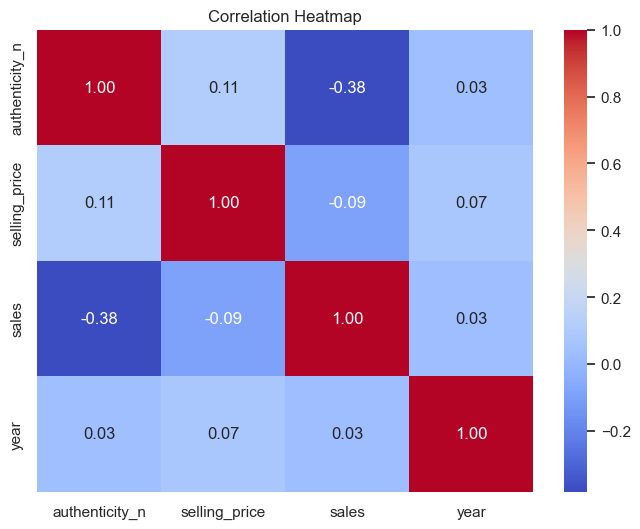

In [9]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


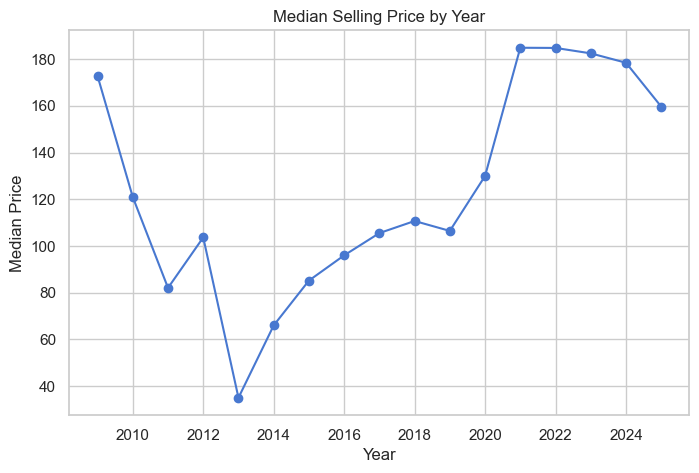

In [10]:
if "year" in df.columns:
    df["year"] = pd.to_numeric(df["year"], errors="coerce")
    yearly = df.groupby("year")["selling_price"].median().dropna()
    plt.figure(figsize=(8,5))
    plt.plot(yearly.index, yearly.values, marker="o")
    plt.title("Median Selling Price by Year")
    plt.xlabel("Year")
    plt.ylabel("Median Price")
    plt.show()


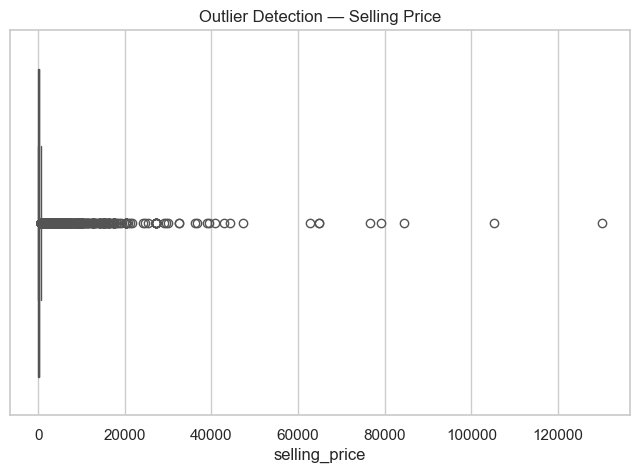

Filtered dataset: 51,028 rows (1–99th percentile kept)


In [11]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["selling_price"])
plt.title("Outlier Detection — Selling Price")
plt.show()

# Optional: filter out extreme values
q_low, q_high = df["selling_price"].quantile([0.01, 0.99])
df_filtered = df[(df["selling_price"] >= q_low) & (df["selling_price"] <= q_high)]
print(f"Filtered dataset: {len(df_filtered):,} rows (1–99th percentile kept)")


In [12]:
# Median price by condition
condition_summary = df.groupby("condition")["selling_price"].median().sort_values(ascending=False)
display(condition_summary)

# Authenticity premium
auth_summary = df.groupby("authenticity_n")["selling_price"].mean().sort_values(ascending=False)
display(auth_summary)


condition
moc_figure      238.915
loose_figure     66.045
Name: selling_price, dtype: float64

authenticity_n
1    541.103883
0    190.978759
Name: selling_price, dtype: float64

In [13]:
df_filtered.to_csv("../data/starwars/starwars_mocloose_sales_clean.csv", index=False)
